In [2]:
### Install Libraries ###
!pip install twarc --upgrade
!pip install twarc-csv --upgrade
!pip install plotly
!pip install wordcloud


# Import Libraries

In [3]:
##* Import Libraries
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from google.colab import drive

# Set max column width
pd.options.display.max_colwidth = 400

# Set max number of columns
pd.options.display.max_columns = 95


ModuleNotFoundError: No module named 'google.colab'

## Load Dataset

In [4]:
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/quiz-dataset.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


<ipython-input-4-36b9cdb5ac9a>:4: DtypeWarning: Columns (28,29,31,39,41,42,43,67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [5]:
df.head(2)

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,in_reply_to_username,retweeted_user_id,retweeted_username,quoted_user_id,quoted_username,created_at,text,lang,source,public_metrics.impression_count,public_metrics.reply_count,public_metrics.retweet_count,public_metrics.quote_count,public_metrics.like_count,reply_settings,edit_history_tweet_ids,edit_controls.edits_remaining,edit_controls.editable_until,edit_controls.is_edit_eligible,possibly_sensitive,withheld.scope,withheld.copyright,withheld.country_codes,entities.annotations,entities.cashtags,entities.hashtags,entities.mentions,entities.urls,context_annotations,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,attachments.poll_ids,author.id,author.created_at,author.username,author.name,author.description,author.entities.description.cashtags,author.entities.description.hashtags,author.entities.description.mentions,author.entities.description.urls,author.entities.url.urls,author.url,author.location,author.pinned_tweet_id,author.profile_image_url,author.protected,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,author.verified,author.verified_type,author.withheld.scope,author.withheld.copyright,author.withheld.country_codes,geo.coordinates.coordinates,geo.coordinates.type,geo.country,geo.country_code,geo.full_name,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,matching_rules,__twarc.retrieved_at,__twarc.url,__twarc.version
0,1604264110627094528,1604264110627094528,NaN,NaN,NaN,121812371,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-17T23:55:44.000Z,Make Sure you didn't Miss Amor Shabbi Post! https://t.co/A0LA0ZazU1 #cop27 #iran,en,NaN,30,0,0,0,0,everyone,"[""1604264110627094528""]",5,2022-12-18T00:25:44.000Z,True,False,NaN,NaN,NaN,"[{""start"": 26, ""end"": 41, ""probability"": 0.4836, ""type"": ""Person"", ""normalized_text"": ""Amor Shabbi Post""}, {""start"": 69, ""end"": 73, ""probability"": 0.6341, ""type"": ""Other"", ""normalized_text"": ""cop27""}]",NaN,"[""#cop27"", ""#iran""]",NaN,"[""https://paper.li/f-1303473228?share_id=51d1eeb0-7e66-11ed-b13a-fa163e1a70d7""]","[{""domain"": {""id"": ""29"", ""name"": ""Events [Entity Service]"", ""description"": ""Real world events. ""}, ""entity"": {""id"": ""1575059325864681472"", ""name"": ""COP27 Sharm Al Sheikh, Egypt""}}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121812371,2010-03-10T17:27:12.000Z,AmorShabbi,Amor Shabbi عمر شابي,"Algerian Journalist, Reporting on Sahel & MENA. Managing Editor of @Atlas_Times Phone: +(213) 663 580 030. Email: omar.chabbi@gmail.com",NaN,NaN,"[""@Atlas_Times""]",NaN,"[""http://www.atlas-times.com""]",http://www.atlas-times.com,"Constantine, Algeria.",NaN,https://pbs.twimg.com/profile_images/551336594053943296/tlmS2Bu7_normal.jpeg,False,4841,3404,733.0,420471,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-05T12:54:39+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0
1,1604263630433751040,1604263630433751040,NaN,1.603443e+18,NaN,1080548612298420227,NaN,NaN,339040963.0,BBhuttoZardari,NaN,NaN,2022-12-17T23:53:49.000Z,"honor to chair conf of G77 + China, our group represents developing world. Many members commended leadership of 🇵🇰 at #COP27 where G77 proposal to include loss &amp; damage on agenda was accepted. Today we demand reforming international system so it works for all not just the few. https:

In [6]:
# Extract hashtags from the 'text' column and create a new 'hashtags' column
df['hashtags'] = df['text'].apply(lambda x: re.findall(r'#\w+', x))

df. head(1)


,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,in_reply_to_username,retweeted_user_id,retweeted_username,quoted_user_id,quoted_username,created_at,text,lang,source,public_metrics.impression_count,public_metrics.reply_count,public_metrics.retweet_count,public_metrics.quote_count,public_metrics.like_count,reply_settings,edit_history_tweet_ids,edit_controls.edits_remaining,edit_controls.editable_until,edit_controls.is_edit_eligible,possibly_sensitive,withheld.scope,withheld.copyright,withheld.country_codes,entities.annotations,entities.cashtags,entities.hashtags,entities.mentions,entities.urls,context_annotations,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,attachments.poll_ids,author.id,author.created_at,author.username,author.name,author.description,author.entities.description.cashtags,author.entities.description.hashtags,author.entities.description.mentions,author.entities.description.urls,author.entities.url.urls,author.url,author.location,author.pinned_tweet_id,author.profile_image_url,author.protected,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,author.verified,author.verified_type,author.withheld.scope,author.withheld.copyright,author.withheld.country_codes,geo.coordinates.coordinates,geo.coordinates.type,geo.country,geo.country_code,geo.full_name,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,matching_rules,__twarc.retrieved_at,__twarc.url,__twarc.version,hashtags
0,1604264110627094528,1604264110627094528,NaN,NaN,NaN,121812371,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-17T23:55:44.000Z,Make Sure you didn't Miss Amor Shabbi Post! https://t.co/A0LA0ZazU1 #cop27 #iran,en,NaN,30,0,0,0,0,everyone,"[""1604264110627094528""]",5,2022-12-18T00:25:44.000Z,True,False,NaN,NaN,NaN,"[{""start"": 26, ""end"": 41, ""probability"": 0.4836, ""type"": ""Person"", ""normalized_text"": ""Amor Shabbi Post""}, {""start"": 69, ""end"": 73, ""probability"": 0.6341, ""type"": ""Other"", ""normalized_text"": ""cop27""}]",NaN,"[""#cop27"", ""#iran""]",NaN,"[""https://paper.li/f-1303473228?share_id=51d1eeb0-7e66-11ed-b13a-fa163e1a70d7""]","[{""domain"": {""id"": ""29"", ""name"": ""Events [Entity Service]"", ""description"": ""Real world events. ""}, ""entity"": {""id"": ""1575059325864681472"", ""name"": ""COP27 Sharm Al Sheikh, Egypt""}}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121812371,2010-03-10T17:27:12.000Z,AmorShabbi,Amor Shabbi عمر شابي,"Algerian Journalist, Reporting on Sahel & MENA. Managing Editor of @Atlas_Times Phone: +(213) 663 580 030. Email: omar.chabbi@gmail.com",NaN,NaN,"[""@Atlas_Times""]",NaN,"[""http://www.atlas-times.com""]",http://www.atlas-times.com,"Constantine, Algeria.",NaN,https://pbs.twimg.com/profile_images/551336594053943296/tlmS2Bu7_normal.jpeg,False,4841,3404,733.0,420471,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-05T12:54:39+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0,"[#cop27, #iran]"


# Section A: Extracting Popular Hashtags

In [7]:
# Explode the 'hashtags' column to create a row for each hashtag
df = df.explode('hashtags')


In [8]:
# Combine all hashtags into a single string
list_hashtags = ' '.join(df['hashtags'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(list_hashtags)


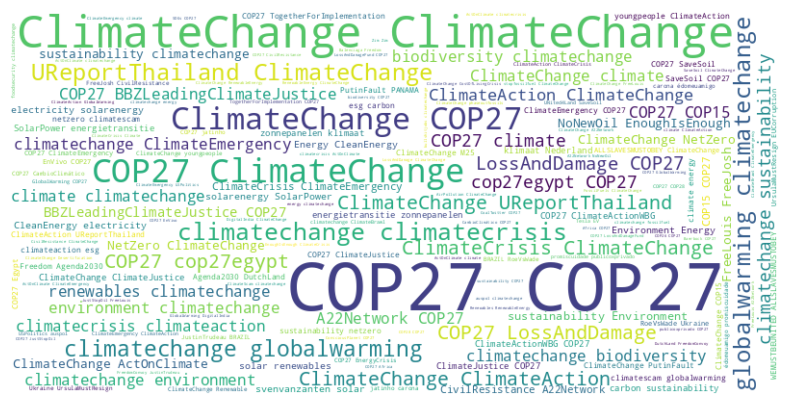

In [9]:
#visualize:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the word plot, it is clear that the common topic from hashtags is the COP27 conference as well as climate change.

# Section B: Exploring Tweet Volume

In [10]:
#parse timestamp
df['created_at'] = pd.to_datetime(df['created_at'])


In [11]:
df.set_index('created_at', inplace=True)  #set this column as the index

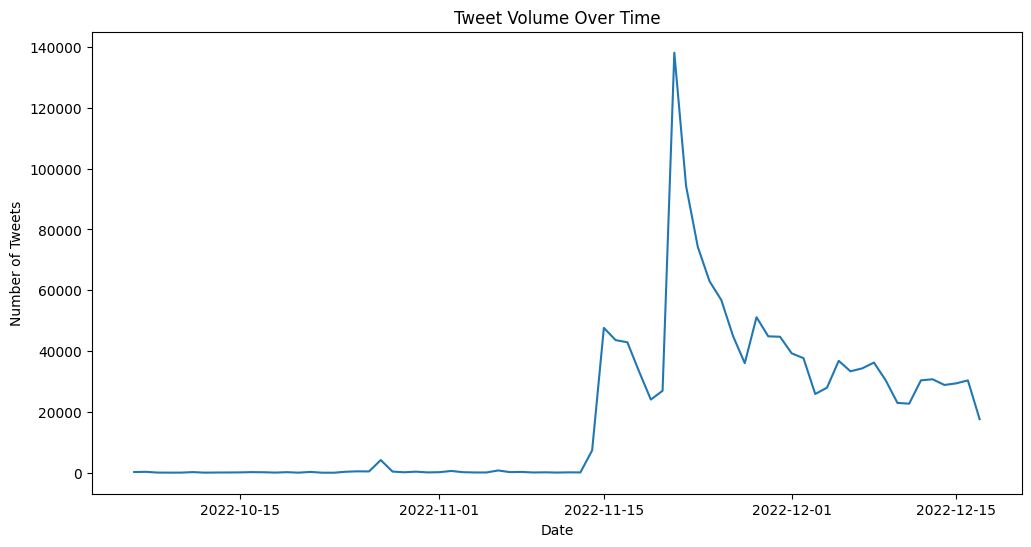

In [12]:
#Group tweets by day intervals to visualize the tweeting volume
tweet_vol = df.resample('D').count()

#Visualize

plt.figure(figsize=(12, 6))
sns.lineplot(data=tweet_vol, x=tweet_vol.index, y='id')
plt.title("Tweet Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()

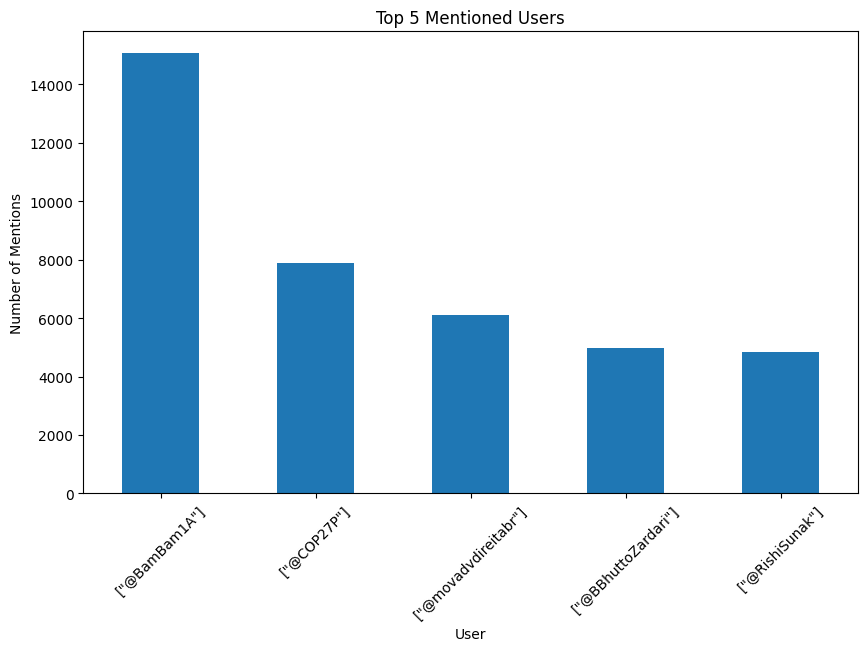

In [13]:
#Visualize top mentions
mentioned_users = df['entities.mentions'].explode().value_counts().head(5)  #top 5 mentioned handles

plt.figure(figsize=(10, 6))
mentioned_users.plot(kind='bar')
plt.title("Top 5 Mentioned Users")
plt.xlabel("User")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.show()

#Section C: Data Interpretation

In [27]:
#filter data to the time around the peak

start_date = '2022-11-15'
end_date = '2022-12-30'    #dates can be changed to suit the search

filtered_data = df[(df.index >= start_date) & (df.index <= end_date)]

In [28]:
filtered_data

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,in_reply_to_username,retweeted_user_id,retweeted_username,quoted_user_id,quoted_username,text,lang,source,public_metrics.impression_count,public_metrics.reply_count,public_metrics.retweet_count,public_metrics.quote_count,public_metrics.like_count,reply_settings,edit_history_tweet_ids,edit_controls.edits_remaining,edit_controls.editable_until,edit_controls.is_edit_eligible,possibly_sensitive,withheld.scope,withheld.copyright,withheld.country_codes,entities.annotations,entities.cashtags,entities.hashtags,entities.mentions,entities.urls,context_annotations,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,attachments.poll_ids,author.id,author.created_at,author.username,author.name,author.description,author.entities.description.cashtags,author.entities.description.hashtags,author.entities.description.mentions,author.entities.description.urls,author.entities.url.urls,author.url,author.location,author.pinned_tweet_id,author.profile_image_url,author.protected,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,author.verified,author.verified_type,author.withheld.scope,author.withheld.copyright,author.withheld.country_codes,geo.coordinates.coordinates,geo.coordinates.type,geo.country,geo.country_code,geo.full_name,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,matching_rules,__twarc.retrieved_at,__twarc.url,__twarc.version,hashtags
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-17 23:55:44+00:00,1604264110627094528,1604264110627094528,NaN,NaN,NaN,121812371,NaN,NaN,NaN,NaN,NaN,NaN,Make Sure you didn't Miss Amor Shabbi Post! https://t.co/A0LA0ZazU1 #cop27 #iran,en,NaN,30,0,0,0,0,everyone,"[""1604264110627094528""]",5,2022-12-18T00:25:44.000Z,True,False,NaN,NaN,NaN,"[{""start"": 26, ""end"": 41, ""probability"": 0.4836, ""type"": ""Person"", ""normalized_text"": ""Amor Shabbi Post""}, {""start"": 69, ""end"": 73, ""probability"": 0.6341, ""type"": ""Other"", ""normalized_text"": ""cop27""}]",NaN,"[""#cop27"", ""#iran""]",NaN,"[""https://paper.li/f-1303473228?share_id=51d1eeb0-7e66-11ed-b13a-fa163e1a70d7""]","[{""domain"": {""id"": ""29"", ""name"": ""Events [Entity Service]"", ""description"": ""Real world events. ""}, ""entity"": {""id"": ""1575059325864681472"", ""name"": ""COP27 Sharm Al Sheikh, Egypt""}}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121812371,2010-03-10T17:27:12.000Z,AmorShabbi,Amor Shabbi عمر شابي,"Algerian Journalist, Reporting on Sahel & MENA. Managing Editor of @Atlas_Times Phone: +(213) 663 580 030. Email: omar.chabbi@gmail.com",NaN,NaN,"[""@Atlas_Times""]",NaN,"[""http://www.atlas-times.com""]",http://www.atlas-times.com,"Constantine, Algeria.",NaN,https://pbs.twimg.com/profile_images/551336594053943296/tlmS2Bu7_normal.jpeg,False,4841,3404,733.0,420471,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-05T12:54:39+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0,#cop27
2022-12-17 23:55:44+00:00,1604264110627094528,1604264110627094528,NaN,NaN,NaN,121812371,NaN,NaN,NaN,NaN,NaN,NaN,Make Sure you didn't Miss Amor Shabbi Post! https://t.co/A0LA0ZazU1 #cop27 #iran,en,NaN,30,0,0,0,0,everyone,"[""1604264110627094528""]",5,2022-12-18T00:25:44.000Z,True,False,NaN,NaN,NaN,"[{""start"": 26, ""end"": 41, ""probability

In [29]:
#Filter top users

top_users = ['@BamBam1A', '@COP27P']

top_tweets = filtered_data[filtered_data['author.username'].isin(top_users)] #showing tweets from the two popular users
top_tweets

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,in_reply_to_username,retweeted_user_id,retweeted_username,quoted_user_id,quoted_username,text,lang,source,public_metrics.impression_count,public_metrics.reply_count,public_metrics.retweet_count,public_metrics.quote_count,public_metrics.like_count,reply_settings,edit_history_tweet_ids,edit_controls.edits_remaining,edit_controls.editable_until,edit_controls.is_edit_eligible,possibly_sensitive,withheld.scope,withheld.copyright,withheld.country_codes,entities.annotations,entities.cashtags,entities.hashtags,entities.mentions,entities.urls,context_annotations,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,attachments.poll_ids,author.id,author.created_at,author.username,author.name,author.description,author.entities.description.cashtags,author.entities.description.hashtags,author.entities.description.mentions,author.entities.description.urls,author.entities.url.urls,author.url,author.location,author.pinned_tweet_id,author.profile_image_url,author.protected,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,author.verified,author.verified_type,author.withheld.scope,author.withheld.copyright,author.withheld.country_codes,geo.coordinates.coordinates,geo.coordinates.type,geo.country,geo.country_code,geo.full_name,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,matching_rules,__twarc.retrieved_at,__twarc.url,__twarc.version,hashtags
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [30]:
#keyword to search for
keyword = "@COP27P"

mask = df['text'].str.contains(keyword, case=False, na=False)

# Apply the mask to filter the DataFrame and return only the rows with the keyword
search = df[mask]
search

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,in_reply_to_username,retweeted_user_id,retweeted_username,quoted_user_id,quoted_username,text,lang,source,public_metrics.impression_count,public_metrics.reply_count,public_metrics.retweet_count,public_metrics.quote_count,public_metrics.like_count,reply_settings,edit_history_tweet_ids,edit_controls.edits_remaining,edit_controls.editable_until,edit_controls.is_edit_eligible,possibly_sensitive,withheld.scope,withheld.copyright,withheld.country_codes,entities.annotations,entities.cashtags,entities.hashtags,entities.mentions,entities.urls,context_annotations,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,attachments.poll_ids,author.id,author.created_at,author.username,author.name,author.description,author.entities.description.cashtags,author.entities.description.hashtags,author.entities.description.mentions,author.entities.description.urls,author.entities.url.urls,author.url,author.location,author.pinned_tweet_id,author.profile_image_url,author.protected,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,author.verified,author.verified_type,author.withheld.scope,author.withheld.copyright,author.withheld.country_codes,geo.coordinates.coordinates,geo.coordinates.type,geo.country,geo.country_code,geo.full_name,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,matching_rules,__twarc.retrieved_at,__twarc.url,__twarc.version,hashtags
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-17 22:54:48+00:00,1604248776520204290,1604248776520204290,NaN,NaN,NaN,760311241042690048,NaN,NaN,NaN,NaN,NaN,NaN,"👋 @g20org @EUCouncil @Cop27P @vonderleyen @RishiSunak @JustinTrudeau: with each passing day the scale of climate devastation worsens. We need a new funding facility to provide loss &amp; damage support for people on the frontlines of the climate crisis. At #COP27, will you deliver?",en,NaN,2,0,0,0,0,everyone,"[""1604248776520204290""]",5,2022-12-17T23:24:48.000Z,True,False,NaN,NaN,NaN,"[{""start"": 258, ""end"": 262, ""probability"": 0.883, ""type"": ""Other"", ""normalized_text"": ""COP27""}]",NaN,"[""#COP27""]","[""@g20org"", ""@EUCouncil"", ""@COP27P"", ""@vonderleyen"", ""@RishiSunak"", ""@JustinTrudeau""]",NaN,"[{""domain"": {""id"": ""10"", ""name"": ""Person"", ""description"": ""Named people in the world like Nelson Mandela""}, ""entity"": {""id"": ""1151432219002454016"", ""name"": ""Ursula von der Leyen"", ""description"": ""President of European Commission""}}, {""domain"": {""id"": ""10"", ""name"": ""Person"", ""description"": ""Named people in the world like Nelson Mandela""}, ""entity"": {""id"": ""1200070392691314688"", ""name"": ""Rishi S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,760311241042690048,2016-08-02T03:08:20.000Z,Joshi_1kun,Sam-Marie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png,False,4,116,0.0,299,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-05T12:54:39+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2C...,2.13.0,#COP27
2022-12-17 22:10:24+00:00,1604237603876012032,1604237603876012032,NaN,1.594234e+18,NaN,880753648984358912,NaN,NaN,3.390410e+08,BBhuttoZardari,NaN,NaN,"In monumental achievement for climate justice &amp; G77 led by 🇵🇰. #COP27 has suc